In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("15-real_estate_dataset.csv")

In [3]:
df.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


Dataset Columns:

ID: A unique identifier for each property.

Square_Feet: The area of the property in square meters.

Num_Bedrooms: The number of bedrooms in the property.

Num_Bathrooms: The number of bathrooms in the property.

Num_Floors: The number of floors in the property.

Year_Built: The year the property was built.

Has_Garden: Indicates whether the property has a garden (1 for yes, 0 for no).

Has_Pool: Indicates whether the property has a pool (1 for yes, 0 for no).

Garage_Size: The size of the garage in square meters.

Location_Score: A score from 0 to 10 indicating the quality of the neighborhood (higher scores indicate better neighborhoods).

Distance_to_Center: The distance from the property to the city center in kilometers.

Price: The target variable that represents the price of the property. This is the value we aim to predict.

Objective:
The goal of this task is to develop a regression model that predicts the Price of a real estate property using the other features as inputs. The model should be able to learn the relationship between these features and the price, providing an accurate prediction for unseen data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


In [6]:
df.isna().sum()

ID                    0
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64

ID kolonu gereksiz o yüzden direkt çıkardım.

In [8]:
df = df.drop('ID', axis = 1)

In [9]:
df.head()

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


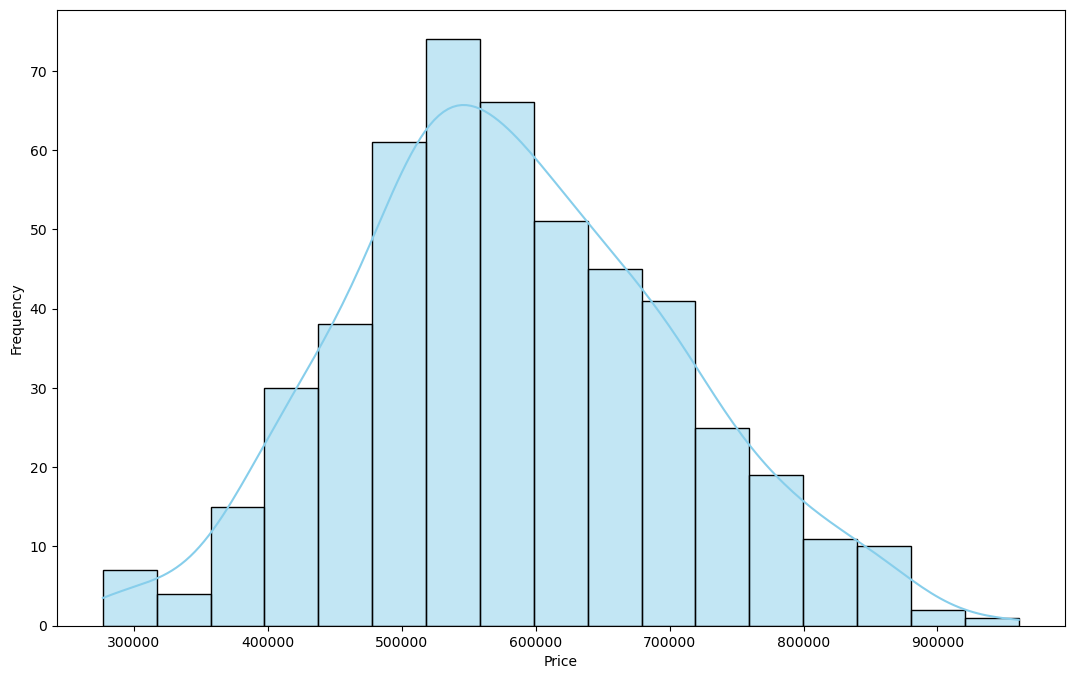

In [20]:
plt.figure(figsize=(13,8))
sns.histplot(df["Price"] , kde = True, color = "skyblue")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

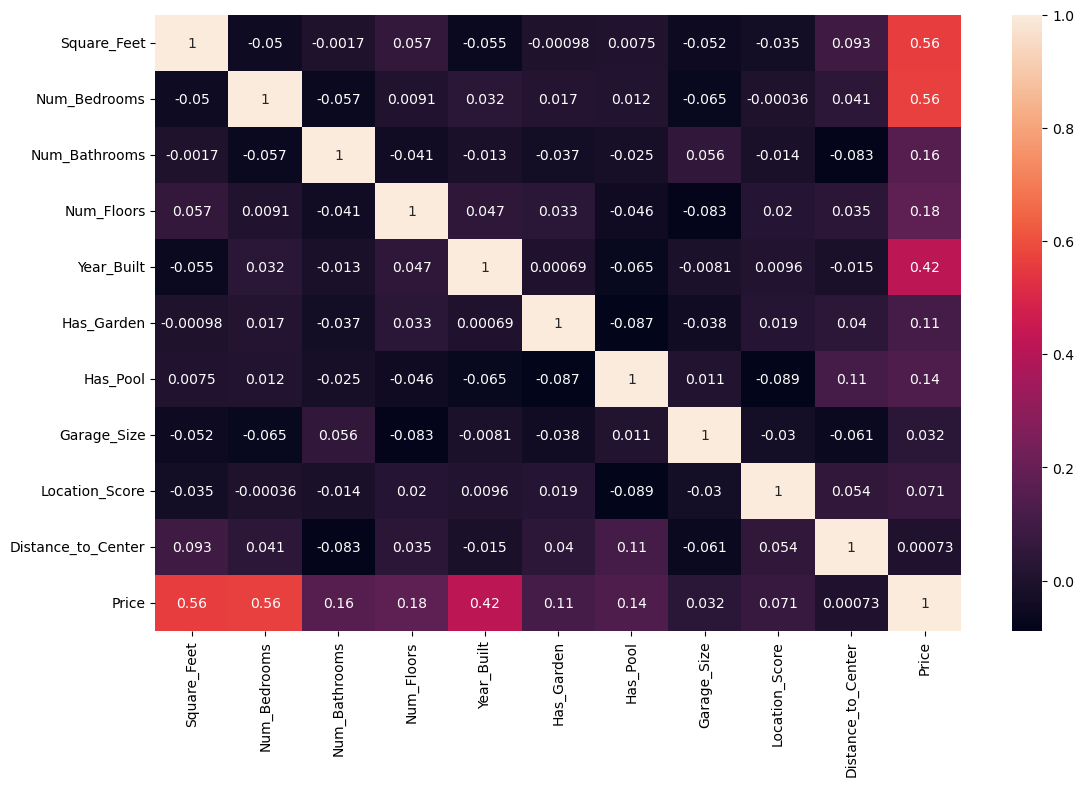

In [24]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [29]:
X = df.drop('Price', axis=1)
y = df["Price"]

In [30]:
X.head()

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center
0,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734
1,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392
2,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599
3,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019
4,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277


In [31]:
y

0      602134.816747
1      591425.135386
2      464478.696880
3      583105.655996
4      619879.142523
           ...      
495    488496.350722
496    657736.921717
497    405324.950201
498    773035.968028
499    864299.500218
Name: Price, Length: 500, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=15)

In [35]:
X_train.shape

(375, 10)

In [36]:
X_test.shape

(125, 10)

In [37]:
X_train.corr()

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center
Square_Feet,1.000000,-0.043284,-0.003441,0.045831,-0.083760,-0.014651,0.032866,-0.090218,-0.045186,0.144891
Num_Bedrooms,-0.043284,1.000000,-0.050016,0.051897,0.062599,0.031472,0.012621,-0.097235,0.014426,0.018012
Num_Bathrooms,-0.003441,-0.050016,1.000000,-0.023365,-0.006287,-0.042669,-0.013964,0.025498,-0.003031,-0.113462
Num_Floors,0.045831,0.051897,-0.023365,1.000000,0.034202,0.038641,-0.042532,-0.100562,0.023213,0.010187
Year_Built,-0.083760,0.062599,-0.006287,0.034202,1.000000,0.010248,-0.041118,-0.005607,-0.008817,0.000883
Has_Garden,-0.014651,0.031472,-0.042669,0.038641,0.010248,1.000000,-0.079778,-0.056768,0.009637,-0.005081
Has_Pool,0.032866,0.012621,-0.013964,-0.042532,-0.041118,-0.079778,1.000000,0.048741,-0.052807,0.123619
Garage_Size,-0.090218,-0.097235,0.025498,-0.100562,-0.005607,-0.056768,0.048741,1.000000,0.012806,-0.071217
Location_Score,-0.045186,0.014426,-0.003031,0.023213,-0.008817,0.009637,-0.052807,0.012806,1.000000,0.030774
Distance_to_Center,0.144891,0.018012,-0.113462,0.010187,0.000883,-0.005081,0.123619,-0.071217,0.030774,1.000000


In [38]:
# Birbirleriyle korelasyonları yüksek olanları atacaktım ama zaten yok ama yine de fonksiyonu yazmaya çalışacağım.

In [39]:
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()
    corr = df.corr()

    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]) > threshold:
                columns_to_drop.add(corr.columns[i])

    return columns_to_drop


In [40]:
columns_to_drop = correlation_for_dropping(X_train, 0.85)

In [41]:
columns_to_drop

set()

# Linear Regression

In [43]:
# SCALING and TRAIN

In [50]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
linear = LinearRegression()

In [59]:
linear.fit(X_train, y_train)

LinearRegression()

In [60]:
# Model Test

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
y_pred = linear.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Absolute Error:  16126.046178854205
Mean Squared Error:  400414087.67810094
R2 Score:  0.9743740138650203


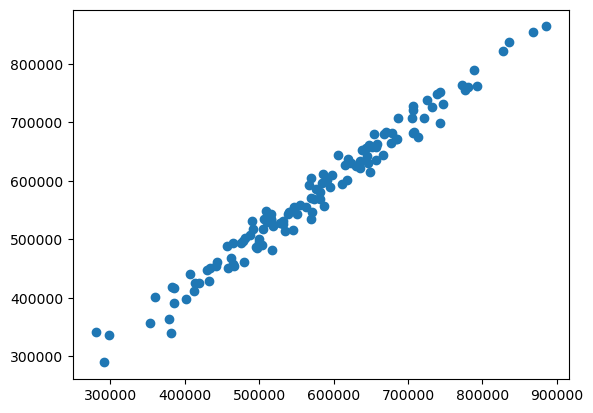

In [65]:
plt.scatter(y_test, y_pred)
plt.show()

# Lasso

In [66]:
from sklearn.linear_model import Lasso

In [67]:
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Absolute Error:  16126.320921629467
Mean Squared Error:  400437441.8503503
R2 Score:  0.9743725192280616


In [68]:
lasso.coef_

array([ 74883.56629512,  71326.6975454 ,  24010.73739302,  17633.6275346 ,
        52950.47122913,  14938.89381469,  23313.98268629,  12827.6380582 ,
        12895.23753594, -11435.99437447])

# Ridge

In [69]:
from sklearn.linear_model import Ridge

In [71]:
ridge = Ridge()
ridge.fit(X_train , y_train)

y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Absolute Error:  16162.438750520747
Mean Squared Error:  403893973.08644575
R2 Score:  0.9741513056787459


In [72]:
ridge.coef_

array([ 74649.52904124,  71130.28302221,  23941.7248197 ,  17604.24595115,
        52800.71544597,  14894.00169135,  23244.26803958,  12758.37350495,
        12849.04859145, -11371.74214511])

# Elastic Net

In [73]:
from sklearn.linear_model import ElasticNet

In [75]:
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)

y_pred = elasticnet.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Absolute Error:  41644.23117372542
Mean Squared Error:  2646036857.3275175
R2 Score:  0.8306570475286789


In [80]:
elasticnet.coef_

array([47208.8570785 , 47068.60581719, 15368.94460004, 13172.36093512,
       34576.19011872,  9523.30127479, 14861.74204072,  5522.59394297,
        7604.47175057, -4832.44087635])

---
# Cross Validation of These Models

In [77]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
lassoCV = LassoCV(cv=5)
ridgeCV = RidgeCV(cv=5)
elasticCV = ElasticNetCV(cv=5)

In [78]:
lassoCV.fit(X_train, y_train)

y_pred = lassoCV.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)

R2 Score:  0.9742655069316256


In [79]:
ridgeCV.fit(X_train, y_train)

y_pred = ridgeCV.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)

R2 Score:  0.9743524340353972


In [82]:
elasticCV.fit(X_train, y_train)

y_pred = elasticCV.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)

R2 Score:  0.01592852369961839
